In [1]:
#%matplotlib widget

In [2]:
import sys

import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from IPython.display import HTML

import thicket as th
from thicket.model_extrap import Modeling

display(HTML("<style>.container { width:80% !important; }</style>"))

data = "../../data/LULESH/no_mpi/strong"
t_ens = th.Thicket.from_caliperreader(data)

t_ens.metadata["jobsize"]


profile
7331897       125
35664178        8
137491261      64
217562079      64
555315360     125
722313857      27
798327413      64
932803878     216
983374723     343
1045893182      8
1380807087     27
1406814917     64
1510263813     27
1700954444    125
1701852224      8
1826084138     27
1938826991      8
2121606719    216
2684629397    343
2707299362    343
2847840283    125
3126421868    343
3135275646     27
3256316844    216
3311857716    125
3365655333    343
3391079461    216
3792318088    216
3862531839     64
4089045361      8
Name: jobsize, dtype: int64

In [3]:

mdl = Modeling(
    t_ens,
    parameters=["jobsize"],
    metrics=[
        "Avg time/rank",
        "Total time",
    ],
)

# use weak scaling instead
mdl.produce_models(use_median=True, calc_total_metrics=True, scaling_parameter="jobsize")

len(mdl.experiment.parameters)

1

In [4]:
t_ens.statsframe.dataframe

,name,Avg time/rank_extrap-model,Avg time/rank_RSS_extrap-model,Avg time/rank_rRSS_extrap-model,Avg time/rank_SMAPE_extrap-model,Avg time/rank_AR2_extrap-model,Avg time/rank_RE_extrap-model,Total time_extrap-model,Total time_RSS_extrap-model,Total time_rRSS_extrap-model,Total time_SMAPE_extrap-model,Total time_AR2_extrap-model,Total time_RE_extrap-model
node,,,,,,,,,,,,,
"{'name': 'main', 'type': 'function'}",main,-561.8317708308057 + 486.64100067447237 * p^(1/4),108127.513302,0.197867,18.063053,0.884946,0.153026,-561.8317119517429 + 486.6409759202622 * p^(1/4),108127.505764,0.197867,18.063055,0.884946,0.153026
"{'name': 'CommRecv', 'type': 'function'}",CommRecv,0.024260378422739544 + 0.00039598712775724314 ...,0.012960,0.105481,13.097851,0.988300,0.104523,0.02426269705179757 + 0.00039598016325089705 *...,0.012974,0.105542,13.101269,0.988287,0.104551
"{'name': 'CommSBN', 'type': 'function'}",CommSBN,6.1456219999999995,205.586865,7.805010,64.503092,1.000000,0.638899,6.145628833333333,205.586658,7.804934,64.502937,1.000000,0.638901
"{'name': 'CommSend', 'type': 'function'}",CommSend,0.7370310097251663 + 0.016396460425357282 * p^...,15.172398,0.182106,19.693291,0.943757,0.165481,0.7370230057518412 + 0.01639643583450623 * p^(...,15.172917,0.182109,19.693681,0.943755,0.165484
"{'name': 'lulesh.cycle', 'type': 'function'}",lulesh.cycle,-559.5022507199732 + 485.51857333691873 * p^(1/4),107917.105773,0.201398,18.124848,0.884649,0.153769,-559.5021893221207 + 485.5185467703582 * p^(1/4),107917.130062,0.201398,18.124851,0.884649,0.153769
"{'name': 'LagrangeLeapFrog', 'type': 'function'}",LagrangeLeapFrog,-258.30096161217904 + 156.30158185934113 * log...,118424.279056,0.156942,18.291172,0.729735,0.148258,-258.30099864577693 + 156.30158915524692 * log...,118424.336814,0.156942,18.291172,0.729735,0.148258
"{'name': 'CalcTimeConstraintsForElems', 'type': 'function'}",CalcTimeConstraintsForElems,1.382238854425235 + 0.04863652194751137 * p^(3...,7.413757,0.082891,10.667412,0.987705,0.090971,1.3822118938445431 + 0.04863671989842907 * p^(...,7.413584,0.082882,10.667008,0.987705,0.090966
"{'name': 'LagrangeElements', 'type': 'function'}",LagrangeElements,-12.30756761483944 + 17.899276629990855 * p^(1...,28904.271782,0.171095,18.997777,0.842693,0.150553,-12.307556039177785 + 17.89927592205004 * p^(1...,28904.303367,0.171095,18.997782,0.842693,0.150553
"{'name': 'ApplyMaterialPropertiesForElems', 'type': 'function'}",ApplyMaterialPropertiesForElems,14.970266658113056 + 5.969830402801103 * p^(3/4),5322.415026,0.090452,12.408115,0.954521,0.098806,14.97026928949793 + 5.969829599688274 * p^(3/4),5322.410114,0.090452,12.408118,0.954521,0.098806


<Figure size 432x288 with 0 Axes>

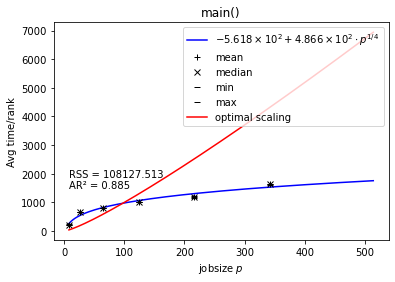

In [5]:
model_obj = t_ens.statsframe.dataframe.at[t_ens.statsframe.dataframe.index[0], "Avg time/rank_extrap-model"]

len(t_ens.statsframe.dataframe)


plt.clf()
fig, ax = model_obj.display(show_mean=True, show_median=True, 
                            show_min_max=True, RSS=True, 
                            AR2=True, show_opt_scaling=True,
                            opt_scaling_func="1.5*p**1*log2(p)**1")

ax.legend(loc=1)
 
# Plot graph
plt.show()

,Avg time/rank_extrap-model,Total time_extrap-model
node,,
"{'name': 'main', 'type': 'function'}",,
"{'name': 'CommRecv', 'type': 'function'}",,
"{'name': 'CommSBN', 'type': 'function'}",,
"{'name': 'CommSend', 'type': 'function'}",,
"{'name': 'lulesh.cycle', 'type': 'function'}",,
"{'name': 'LagrangeLeapFrog', 'type': 'function'}",,
"{'name': 'CalcTimeConstraintsForElems', 'type': 'function'}",,
"{'name': 'LagrangeElements', 'type': 'function'}",,
"{'name': 'ApplyMaterialPropertiesForElems', 'type': 'function'}",,

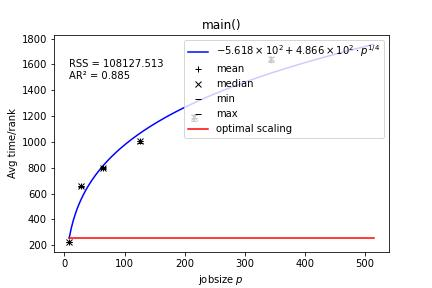
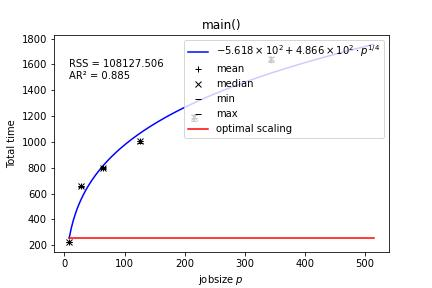
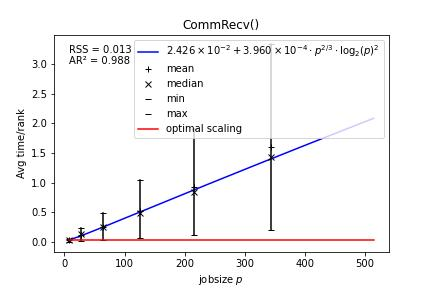
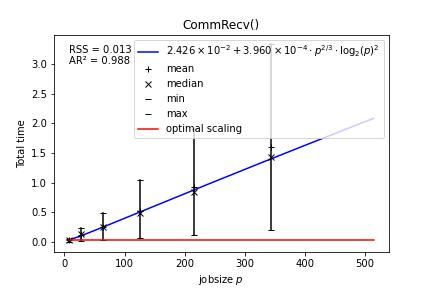
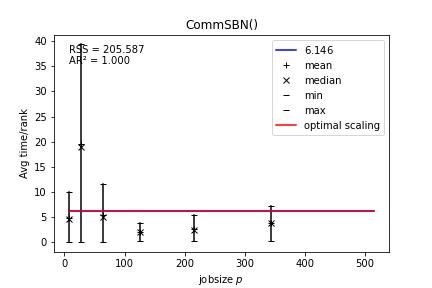
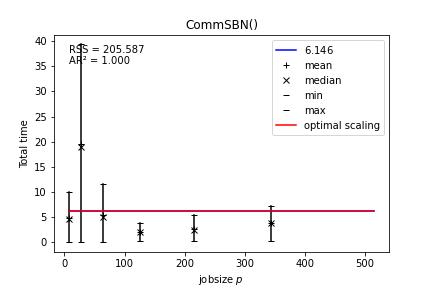
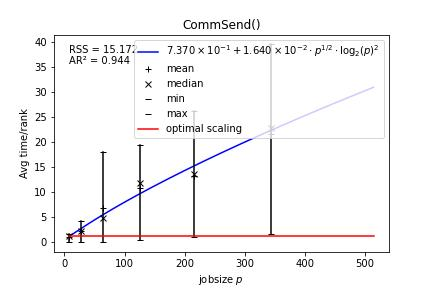
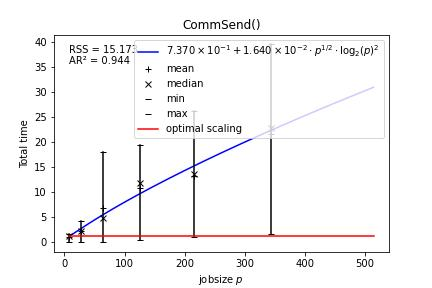
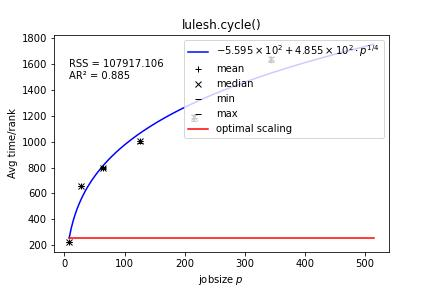
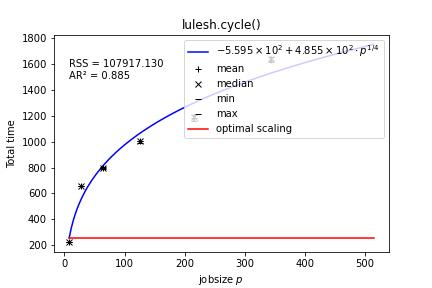
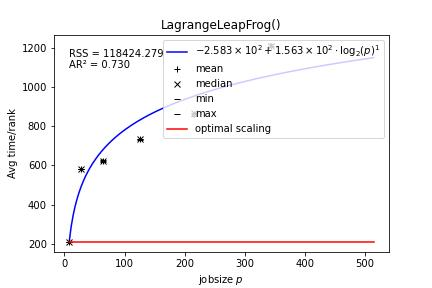
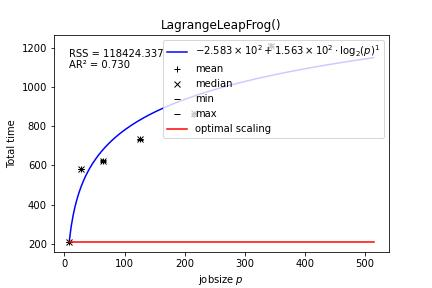
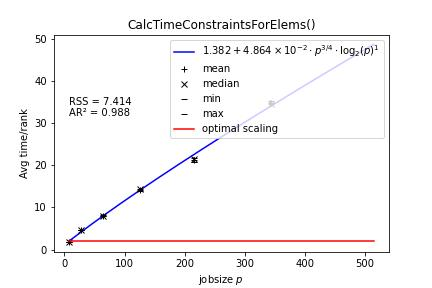
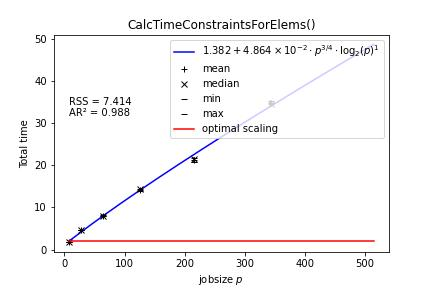
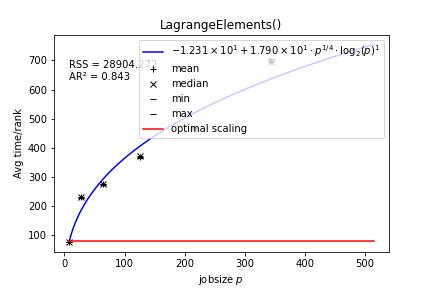
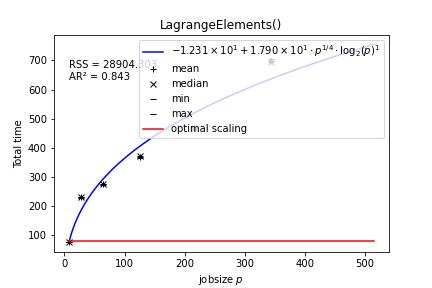
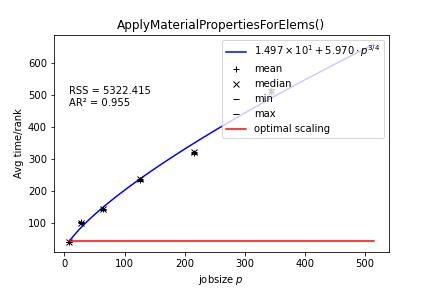
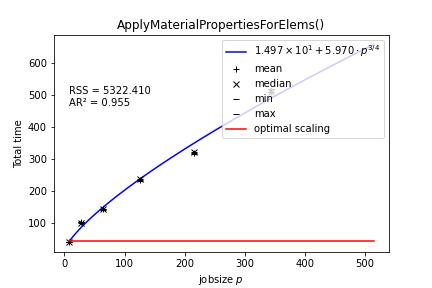
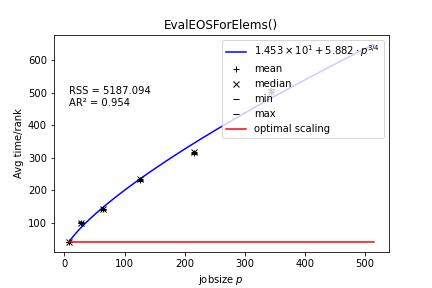
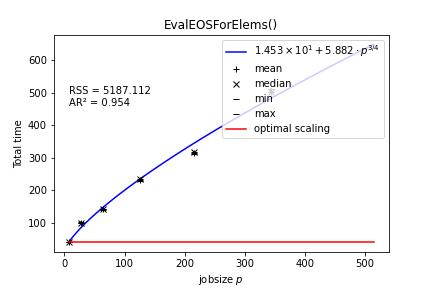
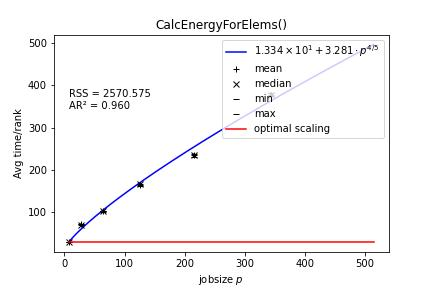
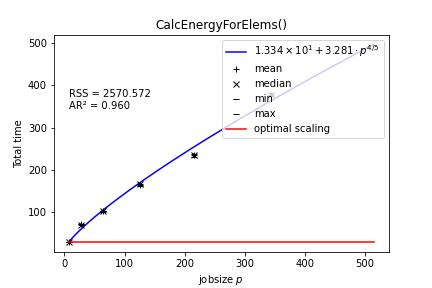
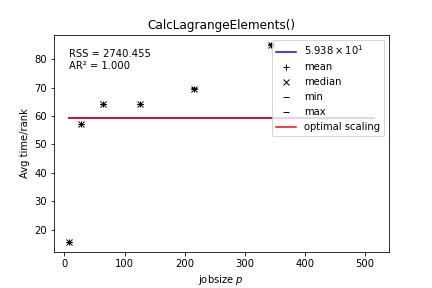
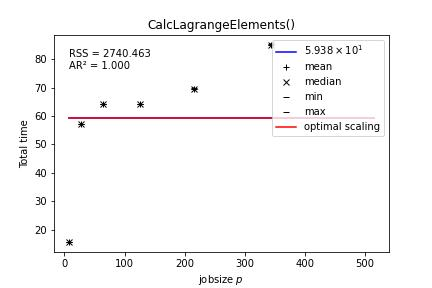
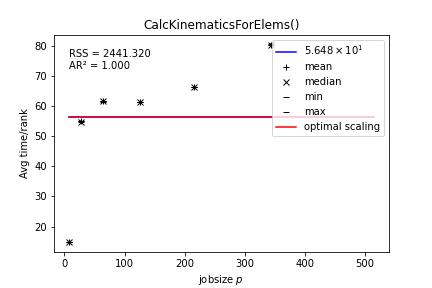
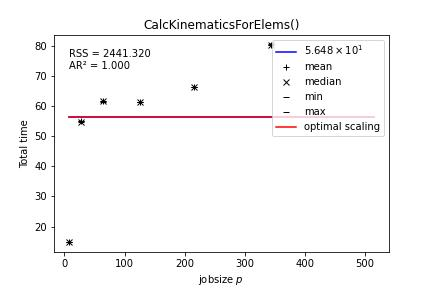
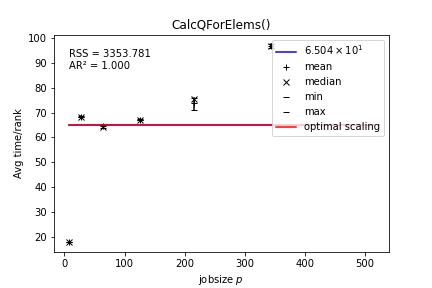
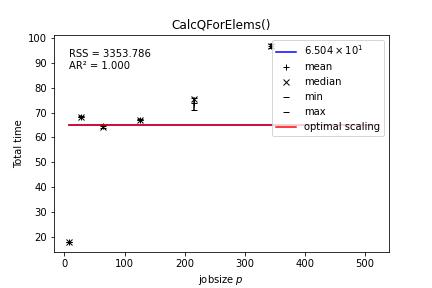
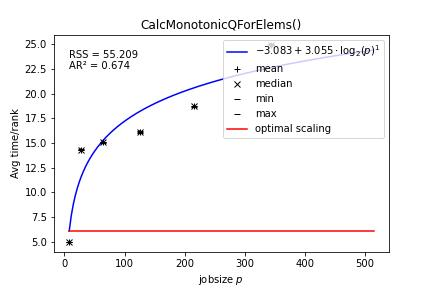
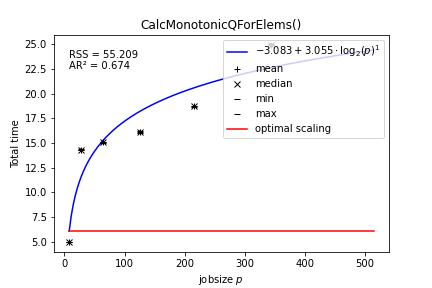
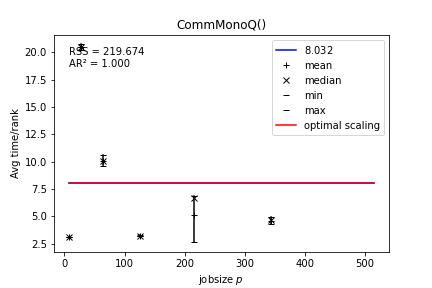
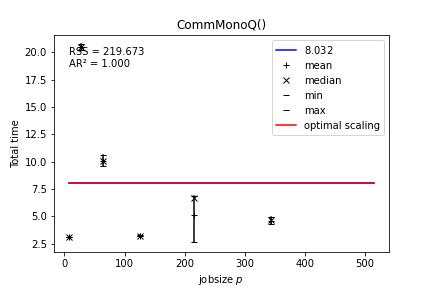
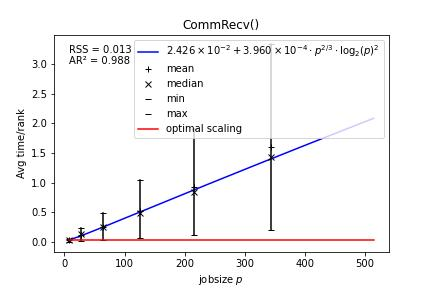
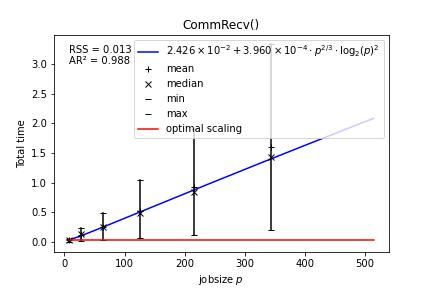
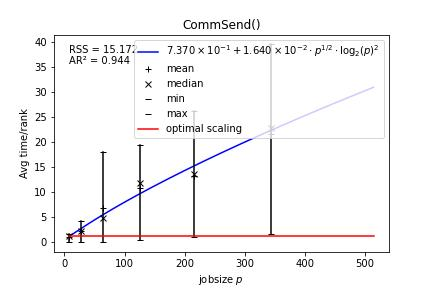
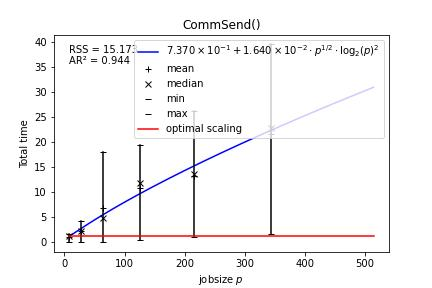
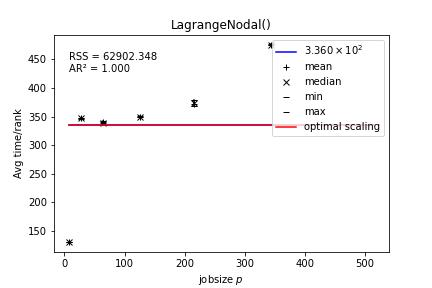
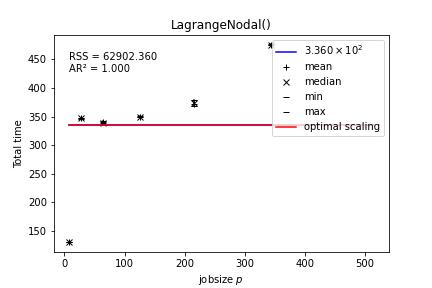
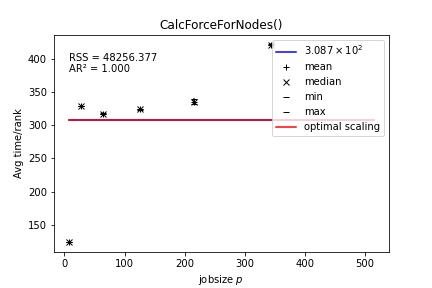
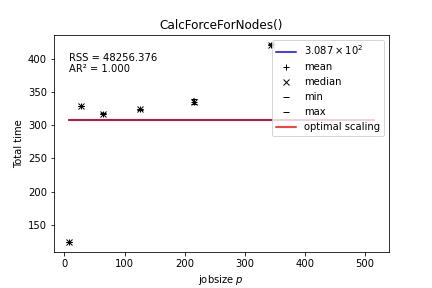
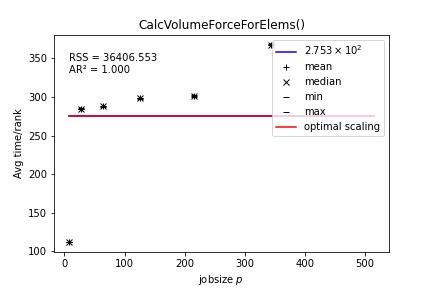
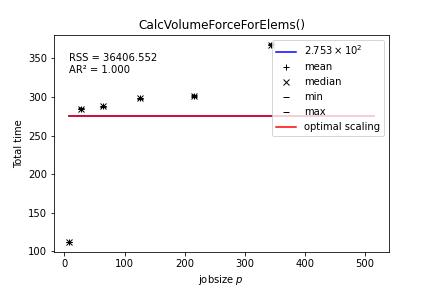
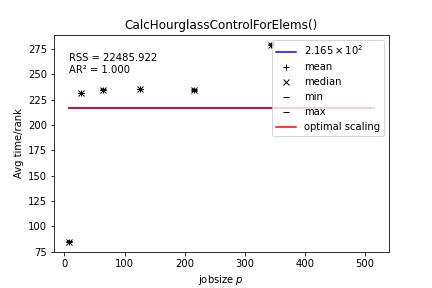
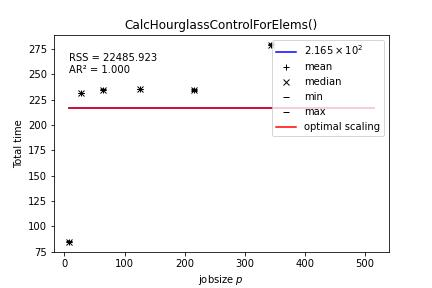
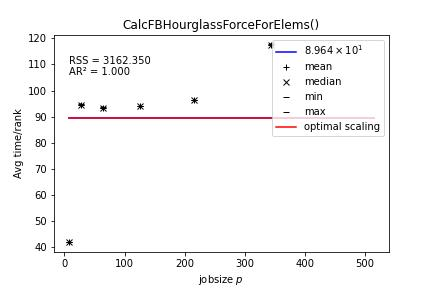
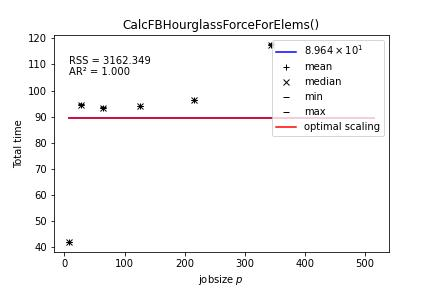
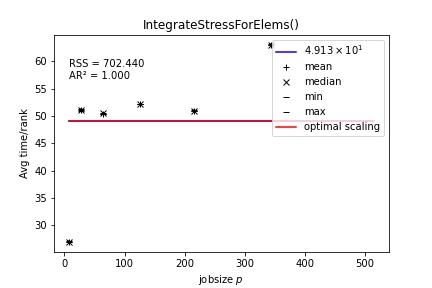
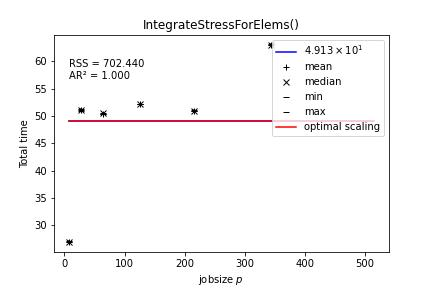
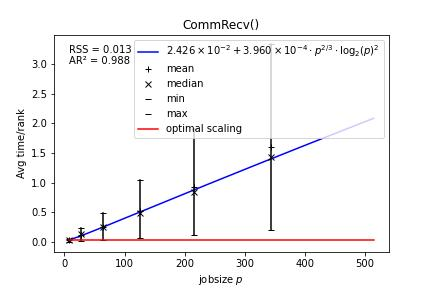
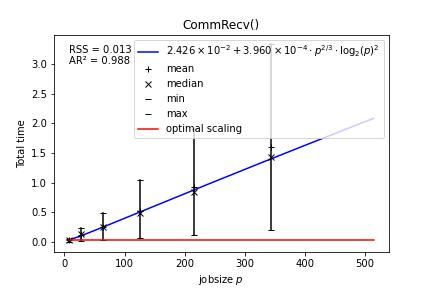
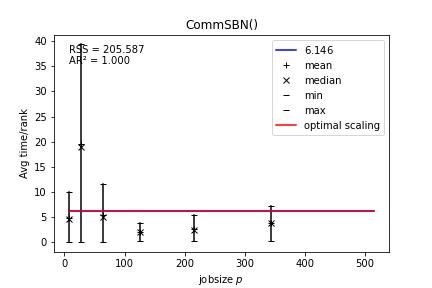
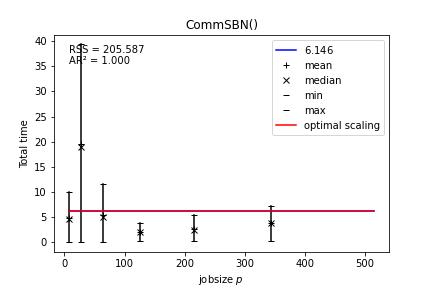
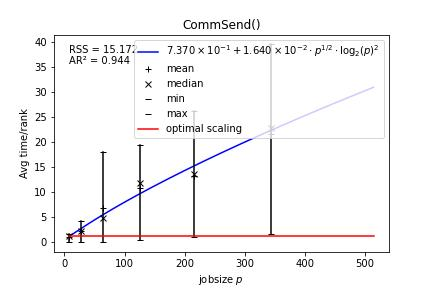
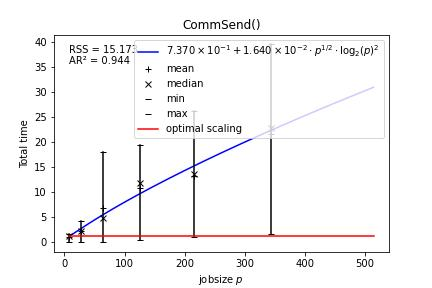
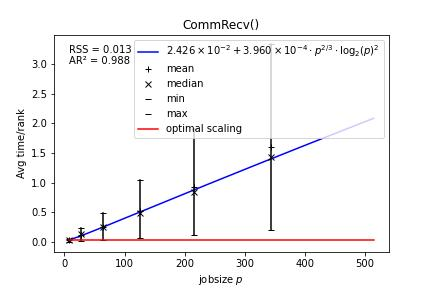
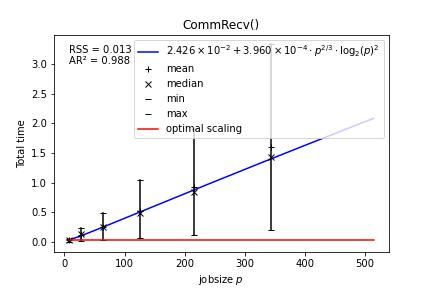
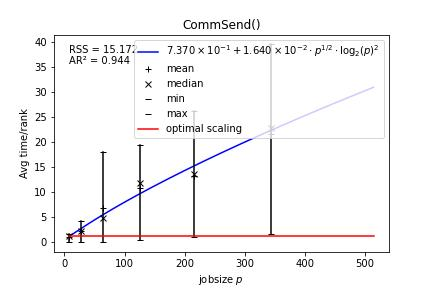
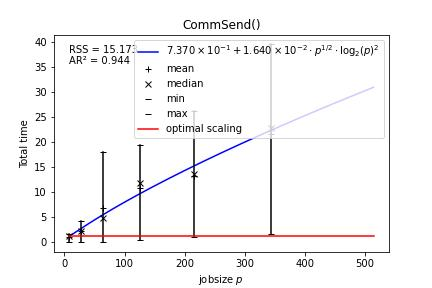
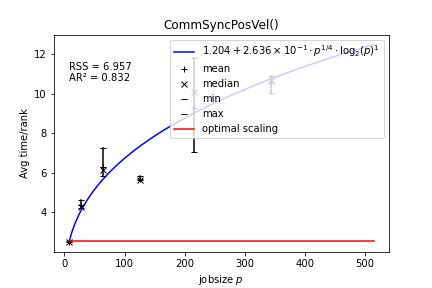
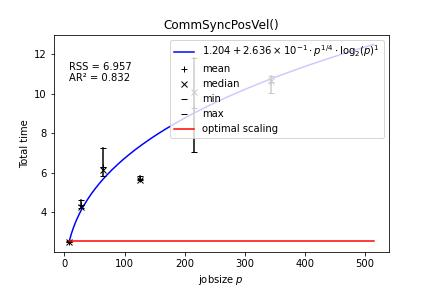
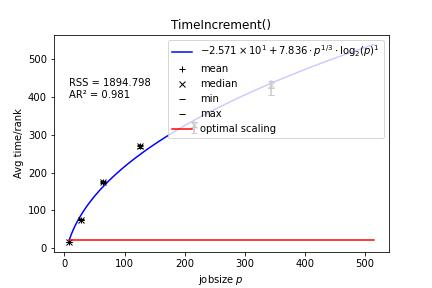
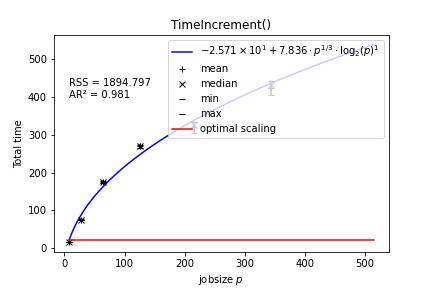

In [6]:
mdl.experiment

with pd.option_context("display.max_colwidth", 1):
    display(HTML(mdl.to_html(show_mean=True, show_median=True, 
                            show_min_max=True, RSS=True, 
                            AR2=True, show_opt_scaling=True)))
